In [3]:
#Etienne Pham Do 40130483
#COMP 333 Lab Assignment 1
#Create a Jupyter notebook using Python code and any of its libraries, but especially pandas,
# to analyse the data in the csv file for restaurant tipping, and to replicate the four plots of
# the wikipedia article.
# Remember to add the new feature \tip rate".
# You may need to do some self-learning of the plotting libraries for Python. Start with the
# cheat sheets for matplotlib and seaborn.

#csv file from: http://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

def get_tip_rate(party_size):
    return 0.18 - 0.01 * party_size

#adding new tip_rate feature
data_frame = pd.read_csv("tips.csv")
data_frame['tip_rate'] = data_frame.apply(lambda row: get_tip_rate(row['size']), axis=1)

#showing tipping data from csv containing: 
#total bill(ratio), tip(ratio), sex(nominal), smoker(nominal), day(nominal), time(nominal), 
#size(interval) and tip rate(ratio) (only showing top 10)
data_frame.head(10)

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,1,16.99,1.01,Female,No,Sun,Dinner,2,0.16
1,2,10.34,1.66,Male,No,Sun,Dinner,3,0.15
2,3,21.01,3.50,Male,No,Sun,Dinner,3,0.15
3,4,23.68,3.31,Male,No,Sun,Dinner,2,0.16
4,5,24.59,3.61,Female,No,Sun,Dinner,4,0.14
5,6,25.29,4.71,Male,No,Sun,Dinner,4,0.14
6,7,8.77,2.00,Male,No,Sun,Dinner,2,0.16
7,8,26.88,3.12,Male,No,Sun,Dinner,4,0.14
8,9,15.04,1.96,Male,No,Sun,Dinner,2,0.16
9,10,14.78,3.23,Male,No,Sun,Dinner,2,0.16


Text(0.5, 1.0, 'Tip amounts where the bins cover $1 increments')

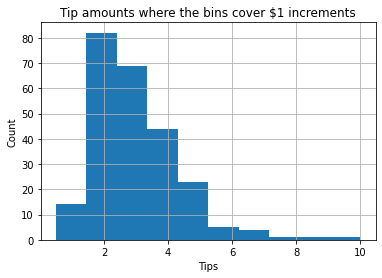

In [11]:
#Histogram of tip amounts where the bins cover $1 increments.
fig1 = data_frame['tip'].hist(bins=10, range=(0.5,10))
fig1.set_xlabel("Tips")
fig1.set_ylabel("Count")
fig1.set_title("Tip amounts where the bins cover $1 increments")

Text(0.5, 1.0, 'Tip amounts where the bins cover $0.10 increments')

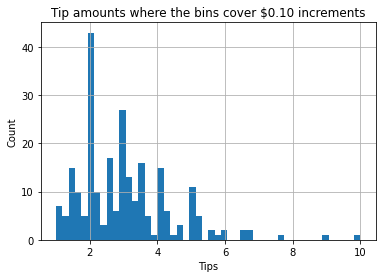

In [12]:
#Histogram of tip amounts where the bins cover $0.10 increments.
fig2 = data_frame['tip'].hist(bins=48)
fig2.set_xlabel("Tips")
fig2.set_ylabel("Count")
fig2.set_title("Tip amounts where the bins cover $0.10 increments")

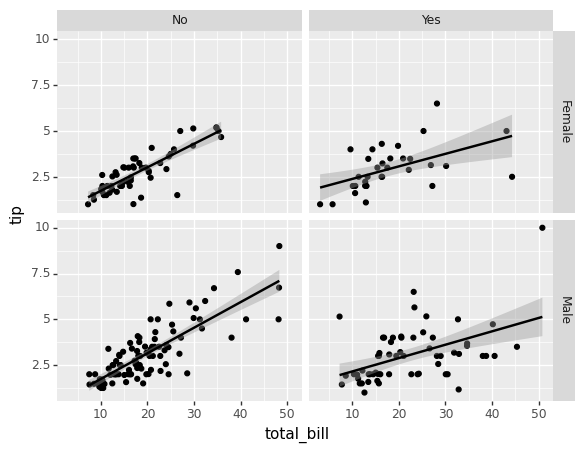

<ggplot: (86438163860)>

In [10]:
(p9.ggplot(data=data_frame,
           mapping=p9.aes(x='total_bill',
                          y='tip'))
    + p9.geom_point()
    + p9.geom_smooth(method='lm')
    + p9.facet_grid("sex ~ smoker")
)


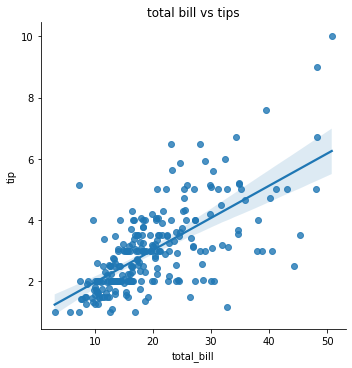

In [14]:
#Scatter plot total bill vs tips
sns.lmplot(x='total_bill', y='tip', data=data_frame, fit_reg=True).set(title='total bill vs tips')